In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = pd.DataFrame(data)
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

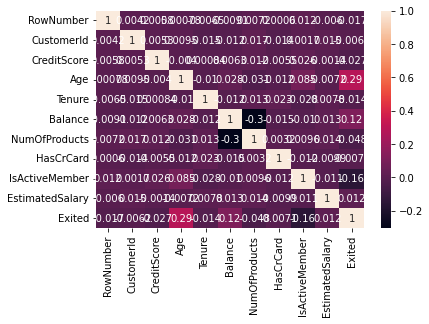

In [7]:
sns.heatmap(df.corr(),annot=True)

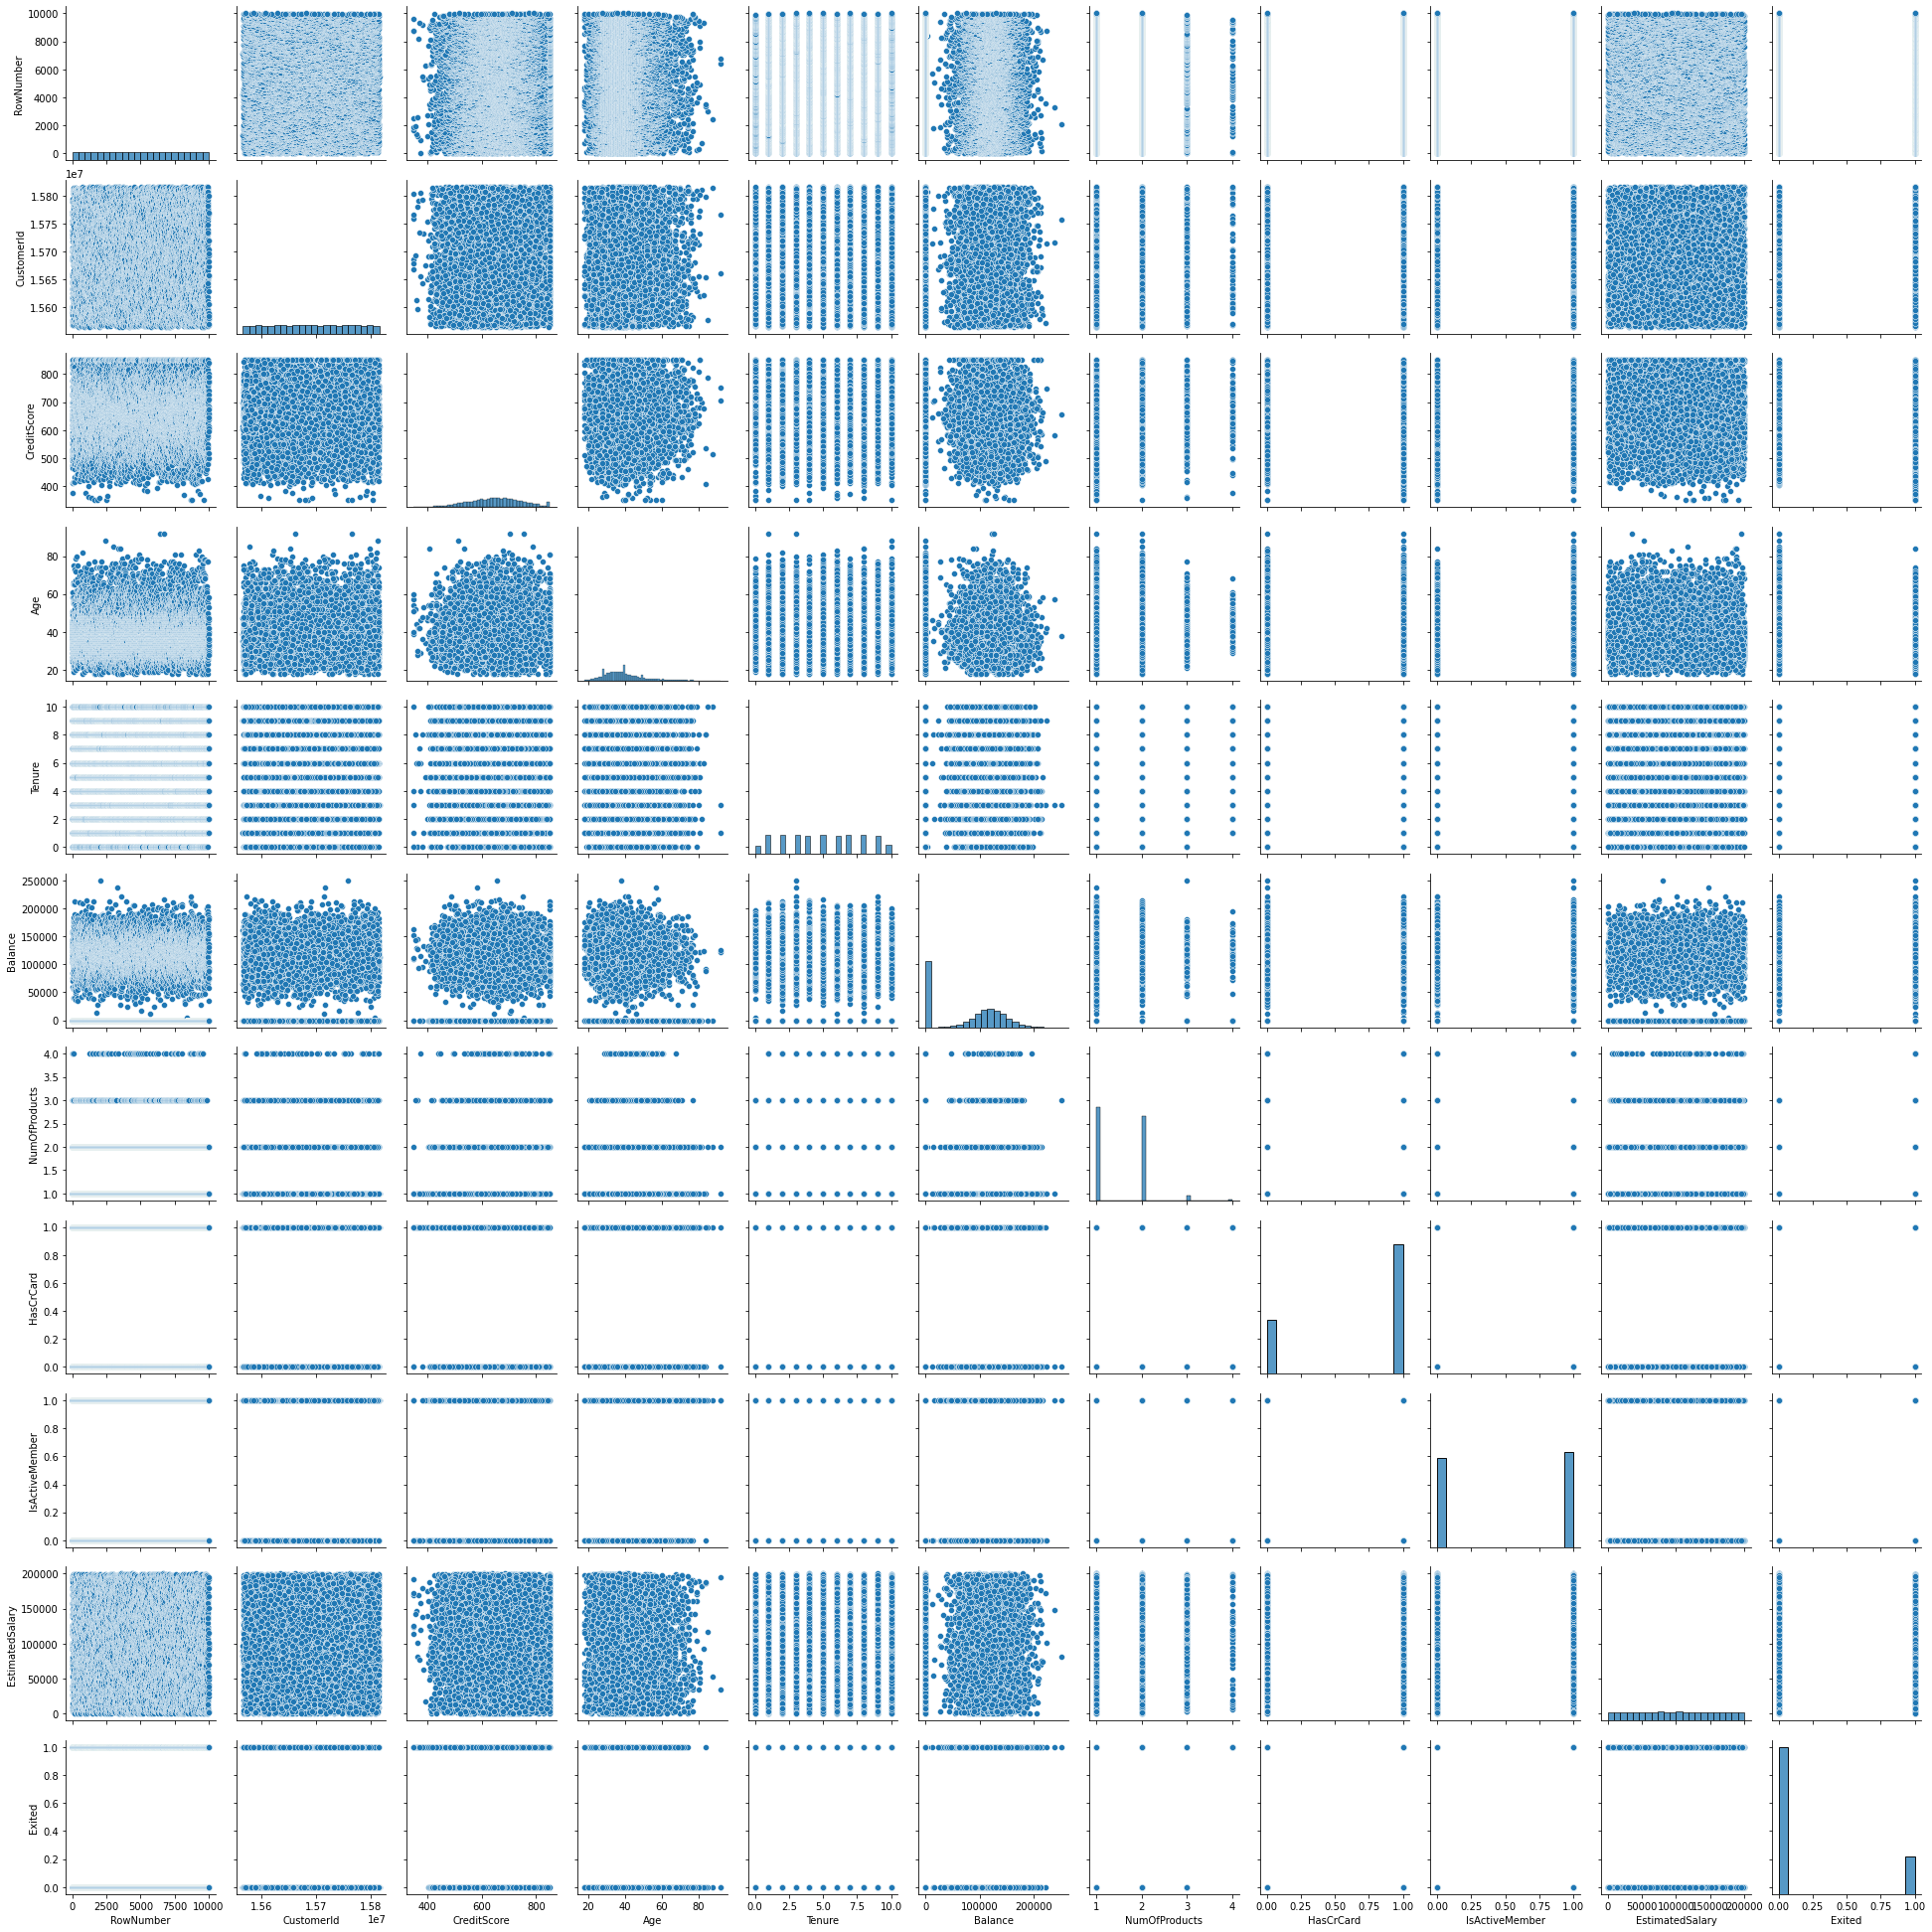

In [8]:
sns.pairplot(df)
#Mivariate Analysis

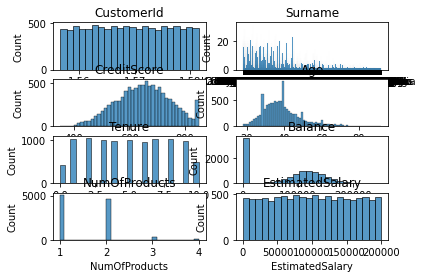

In [9]:
#Univariate Analysis of Continuos Variables
l1=['CustomerId','Surname','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
for i in range(len(l1)):
  plt.subplot(4,2,i+1)
  sns.histplot(df[l1[i]])
  plt.title(f'{l1[i]}')


D:\Applications\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Applications\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Applications\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


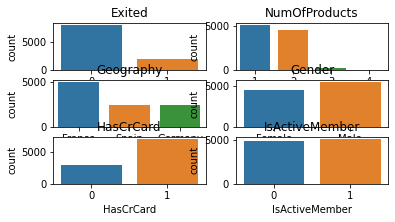

In [10]:
#Univariate Analysis Of Categorical Values
l2=['Exited','NumOfProducts','Geography','Gender','HasCrCard','IsActiveMember']
for i in range(len(l2)):
  plt.subplot(4,2,i+1)
  sns.countplot(df[l2[i]])
  plt.title(f'{l2[i]}')

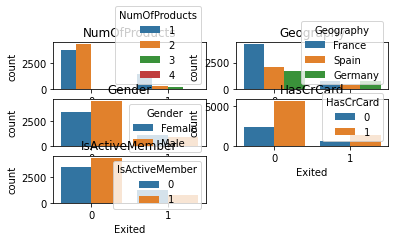

In [11]:
#Bivariate Analysis of Categorical Variables
l2=['NumOfProducts','Geography','Gender','HasCrCard','IsActiveMember']
for i in range(len(l2)):
  plt.subplot(4,2,i+1)
  sns.countplot(data=df,x='Exited',hue=l2[i])
  plt.title(f'{l2[i]}')


In [12]:
#Bivariate Analysis of Continuous Variables
df[['CustomerId','Surname','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,0.015271
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


In [13]:
#Label Encoding for categorical Values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Geography']= label_encoder.fit_transform(df['Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [14]:
#Outiers Identification And Replacing using Quantile-based Flooring and Capping for continuous variables
df2=df[['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]

q1=df["CustomerId"].quantile(0.10)
q2=df["CustomerId"].quantile(0.90)
df["CustomerId"] = np.where(df["CustomerId"] <q1, q1,df["CustomerId"])
df["CUstomerId"] = np.where(df["CustomerId"] >q2, q2,df["CustomerId"])
print(df["CustomerId"].skew())

q1=df['CreditScore'].quantile(0.10)
q2=df['CreditScore'].quantile(0.90)
df['CreditScore'] = np.where(df['CreditScore'] <q1, q1,df['CreditScore'])
df['CreditScore'] = np.where(df['CreditScore'] >q2, q2,df['CreditScore'])
print(df['CreditScore'].skew())

q1=df['Age'].quantile(0.10)
q2=df['Age'].quantile(0.90)
df['Age'] = np.where(df['Age'] <q1, q1,df['Age'])
df['Age'] = np.where(df['Age'] >q2, q2,df['Age'])
print(df['Age'].skew())

q1=df['Tenure'].quantile(0.10)
q2=df['Tenure'].quantile(0.90)
df['Tenure'] = np.where(df['Tenure'] <q1, q1,df['Tenure'])
df['Tenure'] = np.where(df['Tenure'] >q2, q2,df['Tenure'])
print(df['Tenure'].skew())

q1=df['Balance'].quantile(0.10)
q2=df['Balance'].quantile(0.90)
df['Balance'] = np.where(df['Balance'] <q1, q1,df['Balance'])
df['Balance'] = np.where(df['Balance'] >q2, q2,df['Balance'])
print(df['Balance'].skew())

q1=df['NumOfProducts'].quantile(0.10)
q2=df['NumOfProducts'].quantile(0.90)
df['NumOfProducts'] = np.where(df['NumOfProducts'] <q1, q1,df['NumOfProducts'])
df['NumOfProducts'] = np.where(df['NumOfProducts'] >q2, q2,df['NumOfProducts'])
print(df['NumOfProducts'].skew())


q1=df['EstimatedSalary'].quantile(0.10)
q2=df['EstimatedSalary'].quantile(0.90)
df['EstimatedSalary'] = np.where(df['EstimatedSalary'] <q1, q1,df['EstimatedSalary'])
df['EstimatedSalary'] = np.where(df['EstimatedSalary'] >q2, q2,df['EstimatedSalary'])
print(df['EstimatedSalary'].skew())



0.07554150329650933
-0.02927661192804912
0.3906332258724091
8.508869353545179e-05
-0.25893850093255655
0.03360978431366747
0.0028169737081525374


In [15]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CUstomerId
0,1,15634602.0,Hargrave,619.0,0,0,42.0,2.0,0.000,1.0,1,1,101348.88,1,15634602.0
1,2,15647311.0,Hill,608.0,2,0,41.0,1.0,83807.860,1.0,0,1,112542.58,0,15647311.0
2,3,15619304.0,Onio,521.0,0,0,42.0,8.0,149244.792,2.0,1,0,113931.57,1,15619304.0
3,4,15701354.0,Boni,699.0,0,0,39.0,1.0,0.000,2.0,0,0,93826.63,0,15701354.0
4,5,15737888.0,Mitchell,778.0,2,0,43.0,2.0,125510.820,1.0,1,1,79084.10,0,15737888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229.0,Obijiaku,771.0,0,1,39.0,5.0,0.000,2.0,1,0,96270.64,0,15606229.0
9996,9997,15591167.1,Johnstone,521.0,0,1,35.0,9.0,57369.610,1.0,1,1,101699.77,0,15591167.1
9997,9998,15591167.1,Liu,709.0,0,0,36.0,7.0,0.000,1.0,0,1,42085.58,1,15591167.1
9998,9999,15682355.0,Sabbatini,772.0,1,1,42.0,3.0,75075.310,2.0,1,0,92888.52,1,15682355.0


In [16]:
#Dependent Variables
df1=df
df1 = df1.drop(['Surname','Exited','IsActiveMember'],axis=1)
df1


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,CUstomerId
0,1,15634602.0,619.0,0,0,42.0,2.0,0.000,1.0,1,101348.88,15634602.0
1,2,15647311.0,608.0,2,0,41.0,1.0,83807.860,1.0,0,112542.58,15647311.0
2,3,15619304.0,521.0,0,0,42.0,8.0,149244.792,2.0,1,113931.57,15619304.0
3,4,15701354.0,699.0,0,0,39.0,1.0,0.000,2.0,0,93826.63,15701354.0
4,5,15737888.0,778.0,2,0,43.0,2.0,125510.820,1.0,1,79084.10,15737888.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229.0,771.0,0,1,39.0,5.0,0.000,2.0,1,96270.64,15606229.0
9996,9997,15591167.1,521.0,0,1,35.0,9.0,57369.610,1.0,1,101699.77,15591167.1
9997,9998,15591167.1,709.0,0,0,36.0,7.0,0.000,1.0,0,42085.58,15591167.1
9998,9999,15682355.0,772.0,1,1,42.0,3.0,75075.310,2.0,1,92888.52,15682355.0


In [17]:
#Independent Variables
df[['Exited','Surname']]

,Exited,Surname
0,1,Hargrave
1,0,Hill
2,1,Onio
3,0,Boni
4,0,Mitchell
...,...,...
9995,0,Obijiaku
9996,0,Johnstone
9997,1,Liu
9998,1,Sabbatini


In [18]:
#Scaling Variables
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=df.drop(['Surname'],axis=1)
scaled=scaler.fit_transform(df)
print(scaled)

[[-1.73187761 -0.82228476 -0.38373505 ...  0.02324005  1.97716468
  -0.82736341]
 [-1.7315312  -0.64079644 -0.51685663 ...  0.22934839 -0.50577476
  -0.64075827]
 [-1.73118479 -1.04074478 -1.56972729 ...  0.25492371  1.97716468
  -1.05198262]
 ...
 [ 1.73118479 -1.44254813  0.7054415  ... -1.06796841  1.97716468
  -1.46511427]
 [ 1.7315312  -0.14035763  1.46786508 ... -0.1325396   1.97716468
  -0.12621027]
 [ 1.73187761 -0.91200788  1.54047685 ... -1.13968293 -0.50577476
  -0.91961615]]


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
y=df['Exited'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.33, random_state=42)

In [20]:
X_train.shape

(6700, 14)

In [21]:
y_train.shape

(6700,)

In [22]:
X_test.shape

(3300, 14)

In [23]:
y_test.shape

(3300,)